## 시계열 트럭 판매
시계열 분석을 위한 더미 데이터 세트

In [1]:
import sys
import itertools
import pandas as pd 
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/leejieun/kaggle-notebooks/datasets/ddosad/dummy-truck-sales-for-time-series/Truck_sales.csv')

In [23]:
data

,Month,Year,Truck-Sales
2003-01-01,Jan,2003,155
2003-02-01,Feb,2003,173
2003-03-01,Mar,2003,204
2003-04-01,Apr,2003,219
2003-05-01,May,2003,223
...,...,...,...
2014-08-01,Aug,2014,933
2014-09-01,Sep,2014,704
2014-10-01,Oct,2014,639
2014-11-01,Nov,2014,571


In [3]:
data.head()

,Month-Year,Number_Trucks_Sold
0,03-Jan,155
1,03-Feb,173
2,03-Mar,204
3,03-Apr,219
4,03-May,223


In [4]:
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(data))

In [5]:
import calendar
data['Month'] = dates.month
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])
data['Year'] = dates.year

In [6]:
data.drop(['Month-Year'], axis=1, inplace=True)
data.rename(columns={'Number_Trucks_Sold': 'Truck-Sales'}, inplace=True)
data = data[['Month', 'Year', 'Truck-Sales']]

In [7]:
data.set_index(dates, inplace=True)
data.head()

,Month,Year,Truck-Sales
2003-01-01,Jan,2003,155
2003-02-01,Feb,2003,173
2003-03-01,Mar,2003,204
2003-04-01,Apr,2003,219
2003-05-01,May,2003,223


Text(0, 0.5, 'Truck Sales')

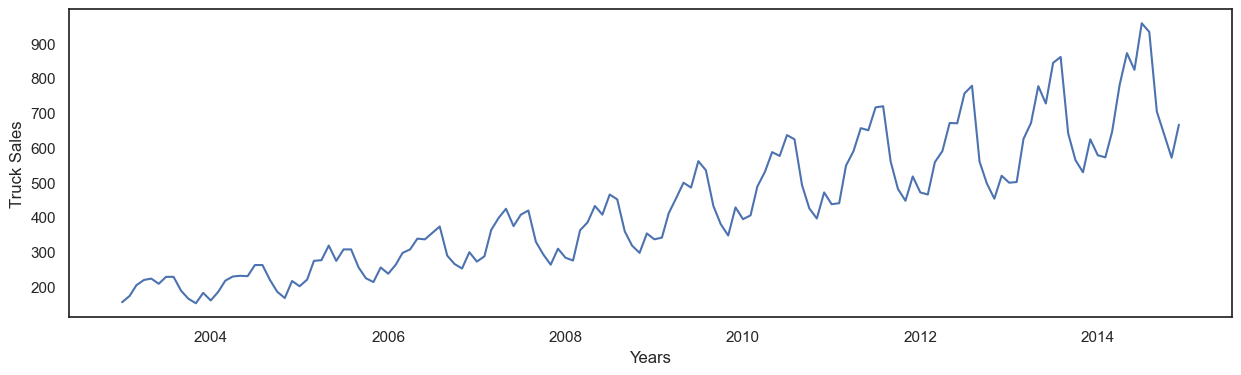

In [8]:
sales_ts = data['Truck-Sales']
sns.set(style="white", rc={'figure.figsize': (15, 4)})
plt.figure(figsize=(15, 4))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Truck Sales')

In [9]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(sales_ts)
dftest

(1.1158932574252716,
 0.9953500083802602,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1107.5217075915425)

In [10]:
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is 1.116
DF test p-value is 0.9954


In [11]:
monthly_sales_data = pd.pivot_table(data, values = "Truck-Sales", columns = "Year", index = "Month")
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Apr,219.0,229.0,276.0,307.0,398.0,385.0,455.0,530.0,590.0,590.0,671.0,781.0
Aug,228.0,262.0,307.0,373.0,419.0,451.0,535.0,624.0,719.0,778.0,861.0,933.0
Dec,182.0,216.0,255.0,299.0,309.0,353.0,428.0,471.0,517.0,519.0,624.0,666.0
Feb,173.0,185.0,220.0,263.0,287.0,275.0,341.0,405.0,440.0,465.0,501.0,572.0
Jan,155.0,160.0,201.0,237.0,272.0,283.0,336.0,394.0,437.0,471.0,499.0,578.0
Jul,228.0,262.0,307.0,354.0,407.0,465.0,561.0,636.0,716.0,756.0,844.0,958.0
Jun,208.0,230.0,274.0,336.0,374.0,407.0,485.0,576.0,650.0,670.0,727.0,824.0
Mar,204.0,217.0,274.0,297.0,363.0,362.0,411.0,488.0,548.0,558.0,625.0,646.0
May,223.0,231.0,318.0,338.0,424.0,432.0,499.0,587.0,656.0,671.0,777.0,872.0


In [12]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,155.0,160.0,201.0,237.0,272.0,283.0,336.0,394.0,437.0,471.0,499.0,578.0
Feb,173.0,185.0,220.0,263.0,287.0,275.0,341.0,405.0,440.0,465.0,501.0,572.0
Mar,204.0,217.0,274.0,297.0,363.0,362.0,411.0,488.0,548.0,558.0,625.0,646.0
Apr,219.0,229.0,276.0,307.0,398.0,385.0,455.0,530.0,590.0,590.0,671.0,781.0
May,223.0,231.0,318.0,338.0,424.0,432.0,499.0,587.0,656.0,671.0,777.0,872.0
Jun,208.0,230.0,274.0,336.0,374.0,407.0,485.0,576.0,650.0,670.0,727.0,824.0
Jul,228.0,262.0,307.0,354.0,407.0,465.0,561.0,636.0,716.0,756.0,844.0,958.0
Aug,228.0,262.0,307.0,373.0,419.0,451.0,535.0,624.0,719.0,778.0,861.0,933.0
Sep,188.0,219.0,255.0,289.0,329.0,359.0,432.0,492.0,560.0,560.0,641.0,704.0


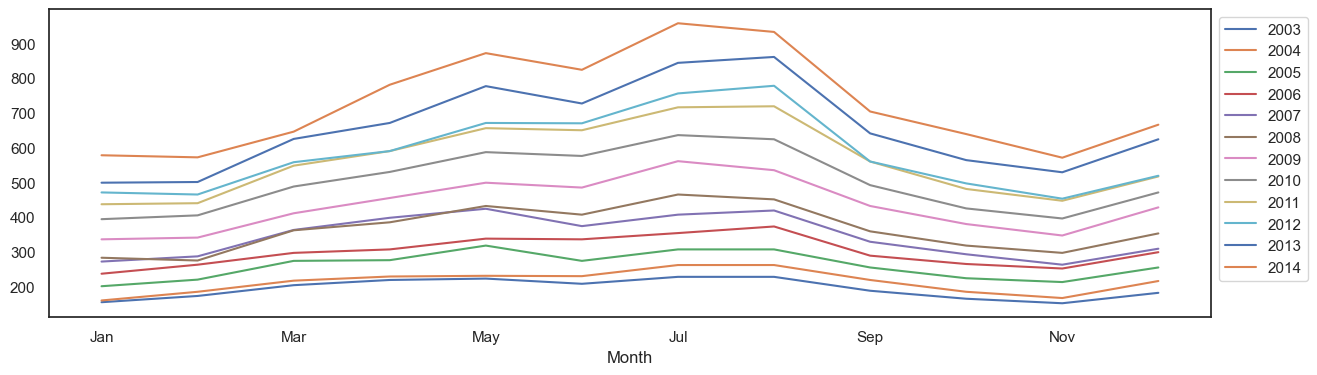

In [13]:
sns.set(style="white", rc={'figure.figsize': (15, 4)})
ax = monthly_sales_data.plot()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_facecolor('white')
plt.show()

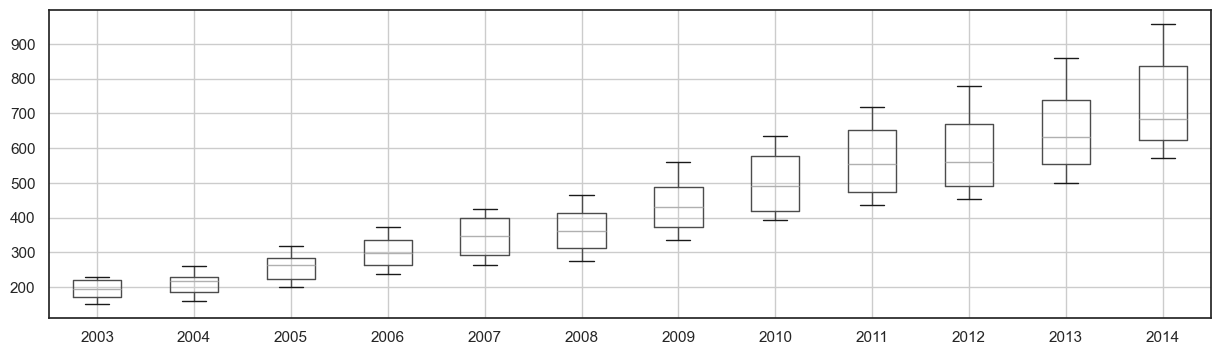

In [14]:
sns.set_theme(style="white", rc={'figure.figsize': (15, 4)})
monthly_sales_data.boxplot()
plt.show()

In [15]:
yearly_sales_data = pd.pivot_table(data, values = "Truck-Sales", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,155.0,173.0,204.0,219.0,223.0,208.0,228.0,228.0,188.0,165.0,152.0,182.0
2004,160.0,185.0,217.0,229.0,231.0,230.0,262.0,262.0,219.0,185.0,167.0,216.0
2005,201.0,220.0,274.0,276.0,318.0,274.0,307.0,307.0,255.0,224.0,213.0,255.0
2006,237.0,263.0,297.0,307.0,338.0,336.0,354.0,373.0,289.0,265.0,252.0,299.0
2007,272.0,287.0,363.0,398.0,424.0,374.0,407.0,419.0,329.0,293.0,263.0,309.0
2008,283.0,275.0,362.0,385.0,432.0,407.0,465.0,451.0,359.0,318.0,297.0,353.0
2009,336.0,341.0,411.0,455.0,499.0,485.0,561.0,535.0,432.0,380.0,347.0,428.0
2010,394.0,405.0,488.0,530.0,587.0,576.0,636.0,624.0,492.0,425.0,396.0,471.0
2011,437.0,440.0,548.0,590.0,656.0,650.0,716.0,719.0,560.0,481.0,447.0,517.0


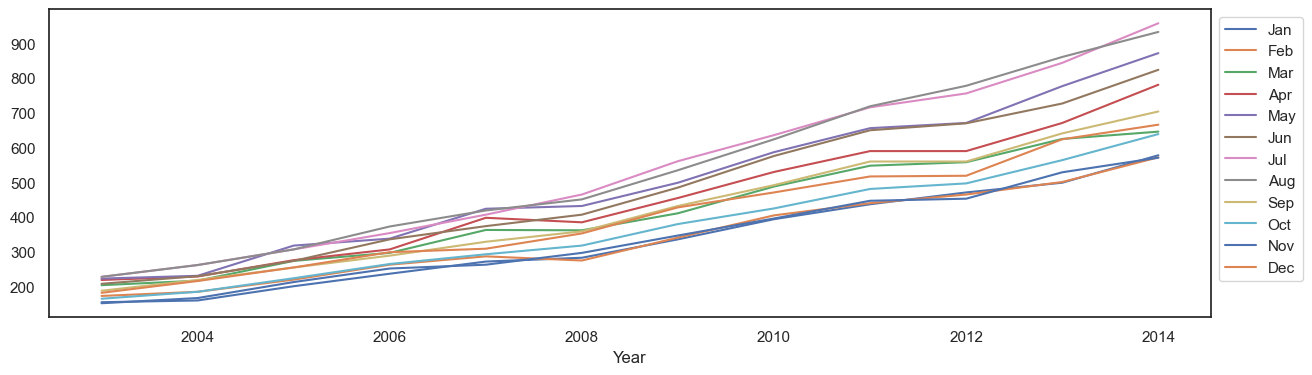

In [16]:
sns.set(style="white", rc={'figure.figsize': (15, 4)})
ax = yearly_sales_data.plot()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_facecolor('white')
plt.show()

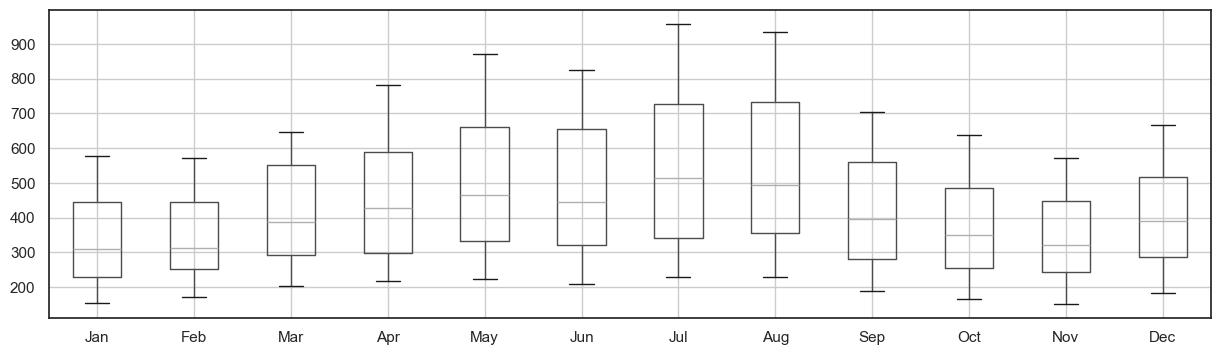

In [17]:
sns.set(style="white", rc={'figure.figsize': (15, 4)})
yearly_sales_data.boxplot()
plt.show()

Text(0, 0.5, 'Truck Sales')

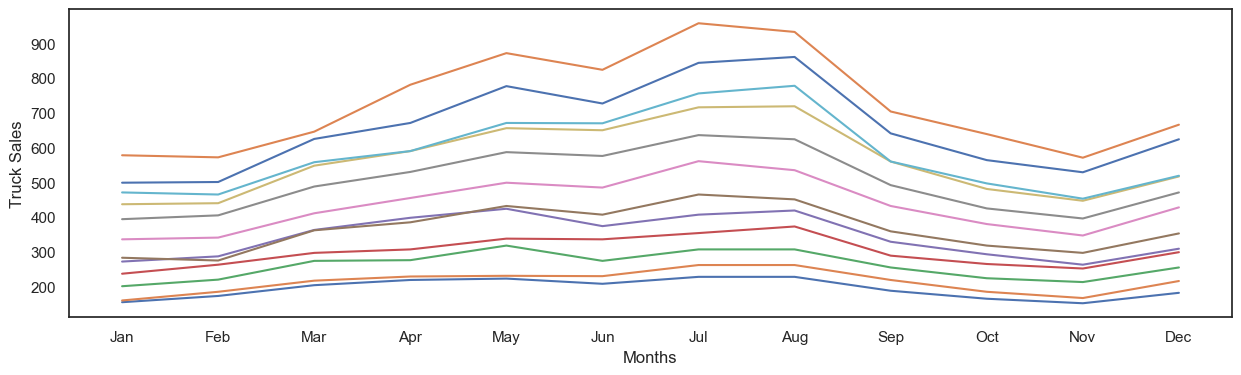

In [18]:
#sales_ts = data['Truck-Sales']
sns.set(style="white", rc={'figure.figsize': (15, 4)})
plt.figure(figsize=(15, 4))
plt.plot(monthly_sales_data)
plt.xlabel('Months')
plt.ylabel('Truck Sales')

In [19]:
decomposition = sm.tsa.seasonal_decompose(sales_ts, model='multiplicative')

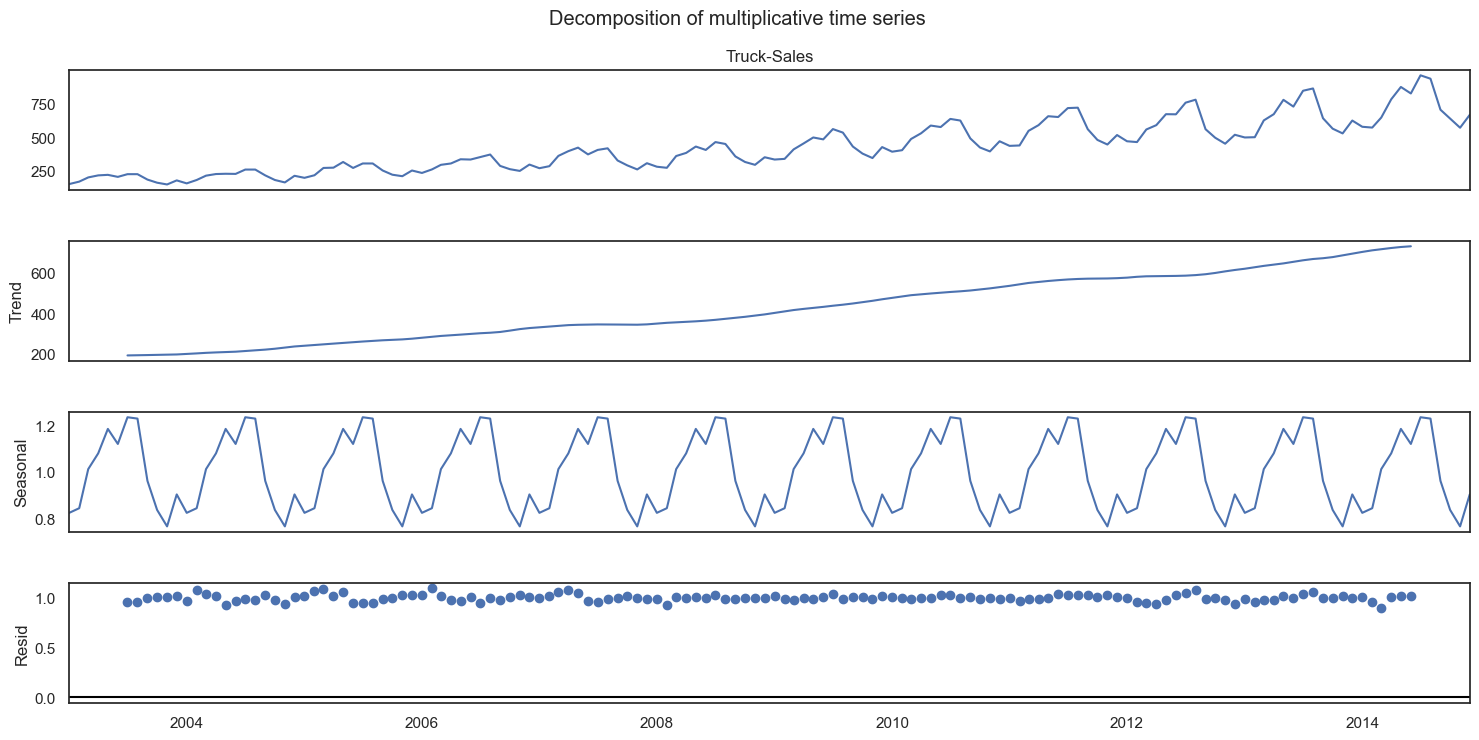

In [20]:
fig = decomposition.plot()
fig.set_figwidth(15)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()